# Avacado Project

# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

Content -

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table

Some relevant columns in the dataset:

Date - The date of the observation

Average Price - The average price of a single avocado

Type - Whether it is conventional or organic

Year - The year information

Region - The city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

#Alogithms
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor

import joblib

# Loading the dataset

In [2]:

df=pd.read_csv('C:/Users/hp/OneDrive/Documents/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Remarks: 


In task 1, we will take "Region" as the target column which has classes, so it is a classification problem.

In task 2, Average Price is the target variable which contains continuous data, so it is a regression type problem.


The dataset contains both numeric as well as categorical data.


In [3]:
#checking the dimension of data

df.shape

(18249, 14)

# Understanding the Dataset

The dataset consists of 18249 rows and 14 columns as explained below:

1.Date: The date of the observation.

2.AveragePrice: Average price of a single avacado.

3.Total Volume: Total number of avacado sold.

4.4046: Total number of avocados with PLU (Product Lookup Code) 4046 sold.

5.4225: Total number of avocados with PLU (Product Lookup Code) 4225 sold.

6.4770: Total number of avocados with PLU (Product Lookup Code) 4770 sold.

7.Total Bags: Total number of bags of avocados sold.

8.Small Bags: Total number of small bags of avocados sold.

9.Large Bags: Total number of large bags of avocados sold.

10.XLarge Bags: Total number of extra large bags of avocados sold.

11.type: Type of avocados (conventional or organic).

12.year: The year of the observation.

13.region: City or region of the observation.

14.Unamed: 0-It is just an index feature

# Task 1

we will take "Region" as the target column which has classes, so it is a multi-classification problem.

# Data Exploration/Analysis

In [4]:
#Checking the top 5 rows

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#Checking the last 5 rows

df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
#checking the sample

df.sample(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6874,39,02-04-2017,1.15,96962.69,2228.91,43114.54,225.38,51393.86,18336.09,33057.77,0.0,conventional,2017,Louisville
7636,6,19-11-2017,1.23,187293.00,48360.00,70014.00,1097.00,67821.00,64562.00,3227.00,32.0,conventional,2017,RichmondNorfolk


In [5]:
#checking columns

df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
#checking the datatype

df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
# Changing date column from object type to Date type
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see that the date column has datetime datatype. Now splitting the data into months and day

In [9]:
df['Month'] = df['Date'].dt.month

In [10]:
df['Day'] = df['Date'].dt.day

Now we have separated Month and Day from Date column and now the column

In [11]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
# checking df again

df.shape

(18249, 16)

In [13]:
#checking Null values

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

No Missing values found

<AxesSubplot:>

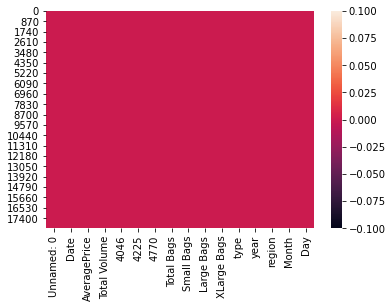

In [14]:
#heatmap for null values
#No null values present

sns.heatmap(df.isnull())

# Data pre-processing:

In [15]:
#Dropping the 'unnmaed:0' column

df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
df.shape

(18249, 15)

Remarks: The shape of our dataset has changed to 18249 rows and 15 columns.

In [17]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

Remarks: We don't see the "Unnamed: 0" column in the column names.

In [18]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

Remarks: This gives us an insight about all the unique values present in each column of the dataset.

# Statistical Analysis

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,10.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# From the above description we can observe the following things.

1.The counts of all the columns are same which means there are no null values present in the daaset.

2.The label Average Price has mean which is bit greater than median, means it is skewed to right. The minimum price of the single fruit avocado is 0.44 dollars(say), max is 3.25 and mean is 1.04.

3.The mean and the median(50%) are very close to each other in most of the columns like 4225(Total number of avocados with PLU 4225), year, Month, Day which means the data is symmetrical (normal) in these columns.

4.The mean is greater than the median in most of the columns which means they are skewed to right.

5.In some of the columns median is greater than the mean, hence they are skewed to left.

6.Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other.

7.By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps.



# Visualization of Dataset

Univariate Analysis:

In [20]:
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13


conventional    9126
organic         9123
Name: type, dtype: int64


([<matplotlib.patches.Wedge at 0x224456dba60>,
 [Text(-0.00028404485245154447, 1.0999999633266004, 'conventional'),
  Text(0.0003098671117657072, -1.199999959992655, 'organic')],
 [Text(-0.00015493355588266062, 0.5999999799963274, '50.01%'),
  Text(0.0001807558151966625, -0.6999999766623819, '49.99%')])

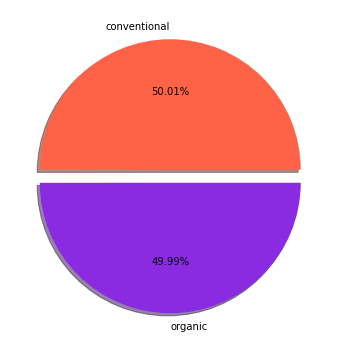

In [21]:
#checking 'Type' of avacodo with countplot


print(df['type'].value_counts())
labels='conventional','organic'
fig,ax=plt.subplots(figsize=(10,6))
explode = [0, 0.1]
colors=['tomato','blueviolet']
ax.pie(df['type'].value_counts(),explode=explode,labels=labels,autopct='%1.2f%%',shadow=True,colors=colors)


We can observe both conventional and organic types of avacado are equal in counts, which means both have equasl demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


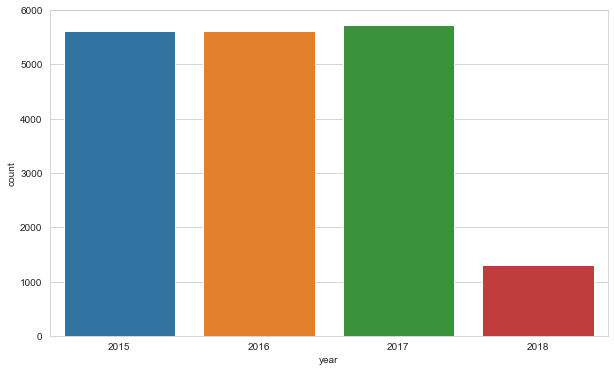

In [22]:
#checking the countplot for 'Year'

sns.set_style("whitegrid")
print(df['year'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df['year'])
plt.show()


Remarks: Its shows that the obseravtions from 2018 is very less compared to 2015, 2016 and 2017.

1     1836
3     1728
5     1620
8     1620
11    1620
4     1512
10    1512
12    1512
2     1404
7     1404
6     1293
9     1188
Name: Month, dtype: int64


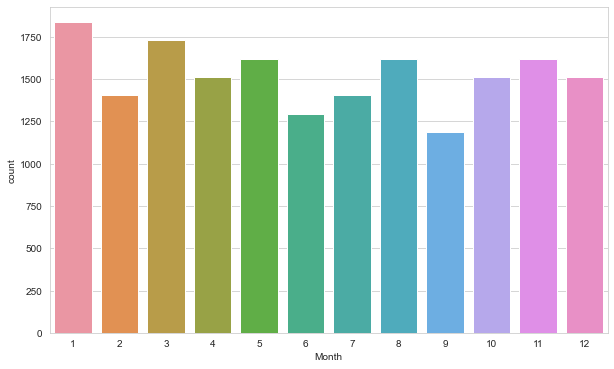

In [23]:
#countplot for months and days 

plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df)
print(df['Month'].value_counts())

Remarks: It shows that in the month of January, February and March, the highest no. of avocados are being sold and least no. of avocados are being sold in June and september.

PhoenixTucson          338
Seattle                338
Spokane                338
Tampa                  338
Pittsburgh             338
TotalUS                338
SouthCentral           338
West                   338
Boston                 338
Chicago                338
Jacksonville           338
CincinnatiDayton       338
Houston                338
Midsouth               338
Northeast              338
Denver                 338
GreatLakes             338
Philadelphia           338
GrandRapids            338
HarrisburgScranton     338
Boise                  338
BaltimoreWashington    338
NewOrleansMobile       338
StLouis                338
Nashville              338
LasVegas               338
Orlando                338
Southeast              338
DallasFtWorth          338
Plains                 338
Roanoke                338
Detroit                338
SouthCarolina          338
Sacramento             338
Atlanta                338
HartfordSpringfield    338
NewYork                338
C

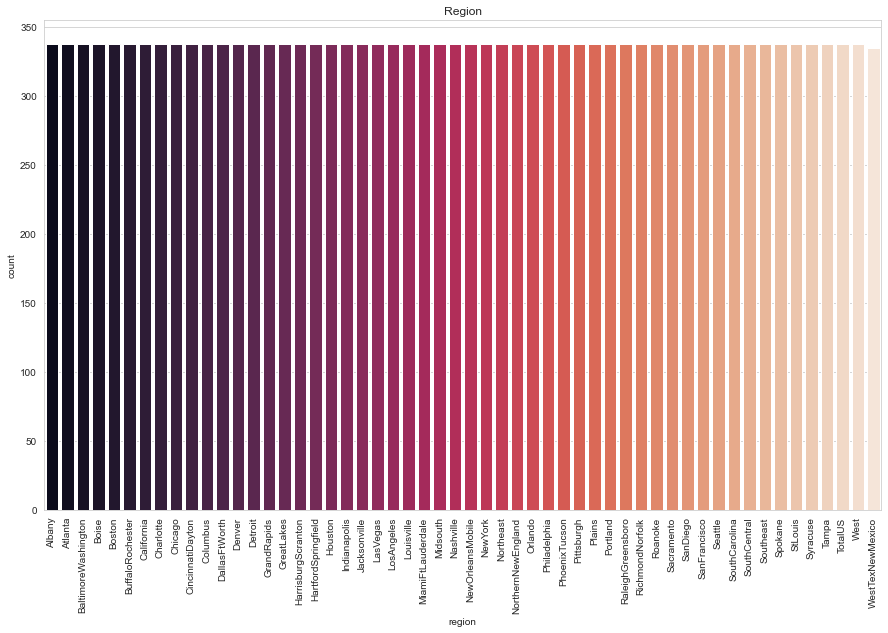

In [24]:
#countplot for Region

plt.figure(figsize=(15,9))
print(df['region'].value_counts())
sns.countplot(df['region'],palette="rocket")
plt.title('Region')
plt.xticks(rotation=90)
plt.show()

We can observe the count of avacado is almost same in all the regions, all of them have the count338 but WestTestNewMexico has count 335 which is a bit less than other regions. Lets plot the distribution plot to know how the data has been distributed in all the columns.

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64


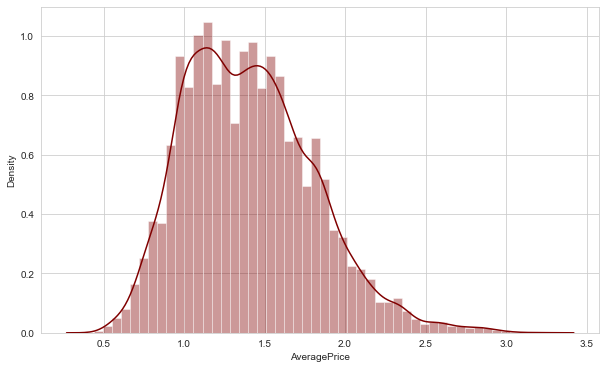

In [25]:
#Distribution plot for target column

print(df['AveragePrice'].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df['AveragePrice'],color='maroon')
plt.show()

Remarks: It shows that the Average price distribution of avocado in most cases is between 1.1 to 1.5.

<AxesSubplot:xlabel='AveragePrice'>

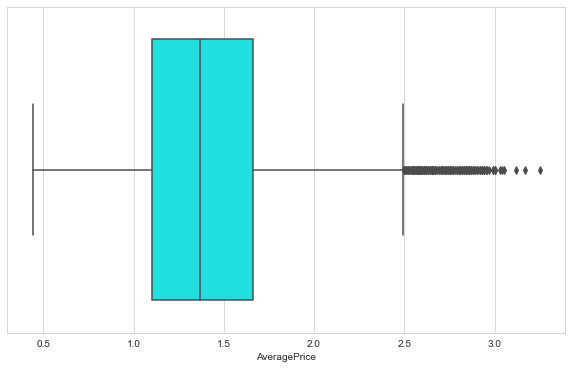

In [26]:
#boxplot for target feature


plt.figure(figsize=(10,6))
sns.boxplot(df['AveragePrice'],color='cyan')

Remarks: It shows that there are some outliers present in this column which we will be removing later

In [27]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


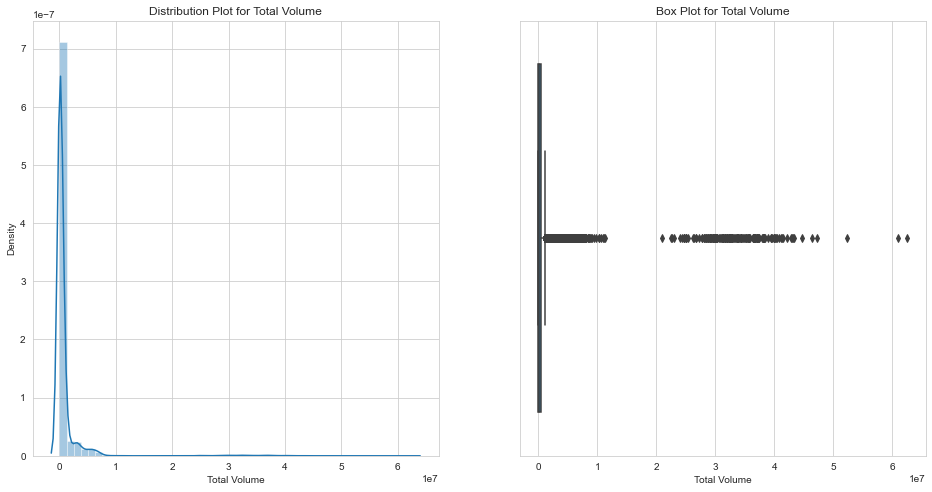

In [28]:
#Checking feature Total Volume using distplot and boxplot
x='Total Volume'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

The distribution plot shows that Data is not distributed normally.

Box plot shows the presence of outliers.

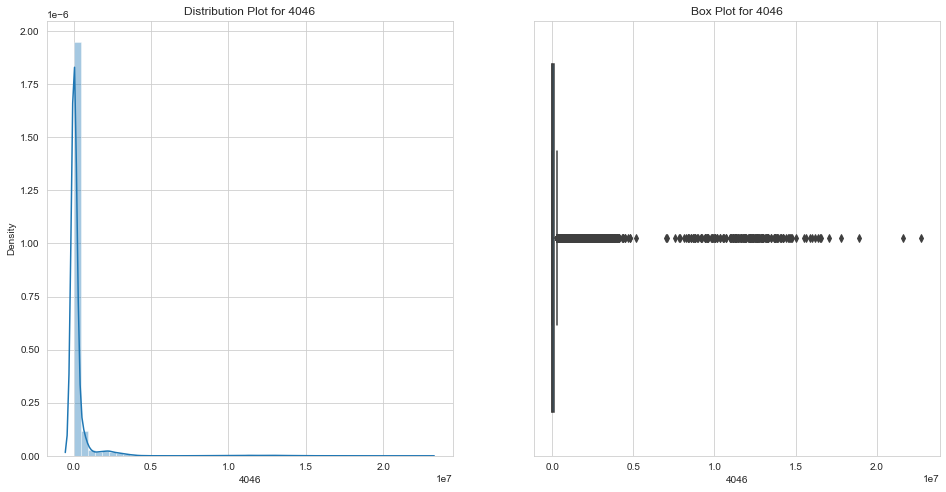

In [29]:
#Checking feature 4046 using distplot and boxplot
x='4046'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

Distribution plot shows that Data is not distributed normally.        

Box plot shows the presence of outliers.

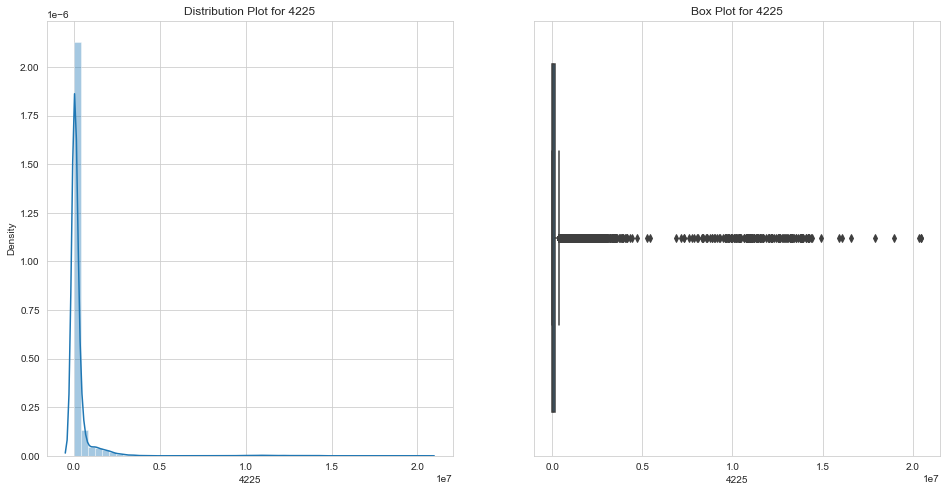

In [30]:
#Checking feature 4225 using distplot and boxplot
x='4225'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

Distribution plot shows that data is not distributed normally.        

Box plot shows the presence of outliers.

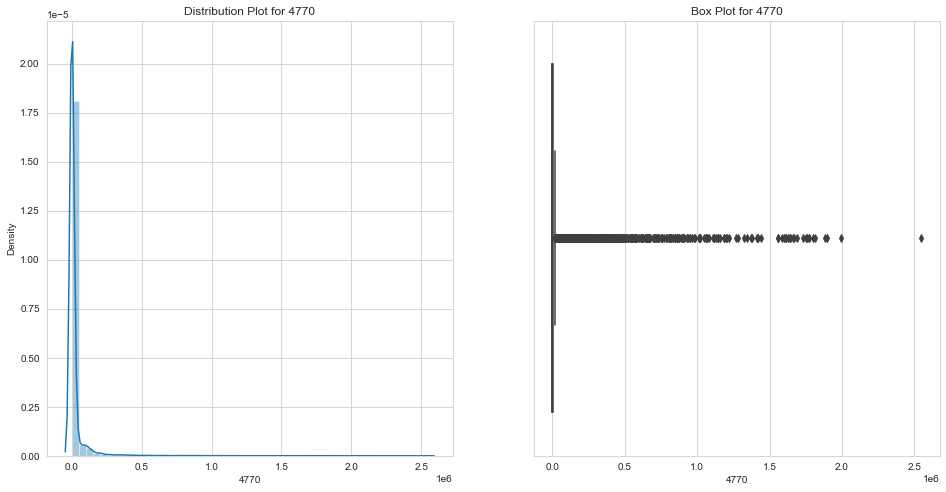

In [31]:
#Checking feature 4770 using distplot and boxplot
x='4770'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

Distribution plot shows that data is not distributed normally.

Box plot shows the presence of outliers.

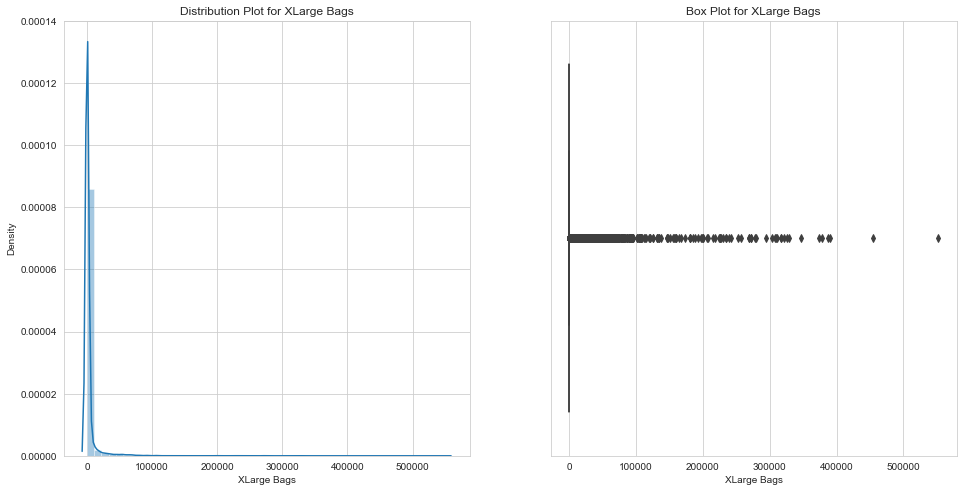

In [32]:
#Checking feature XLarge Bags using distplot and boxplot
x='XLarge Bags'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

#Distribution Plot
sns.distplot(df[x],ax=ax1)
ax1.set_title(f'Distribution Plot for {x}')

#Box Plot
sns.boxplot(df[x],ax=ax2)
ax2.set_title(f'Box Plot for {x}')

plt.show()

Remarks:

Distribution plot shows that data is not distributed normally.

Box plot shows the presence of outliers.

# Bivariate Analysis:

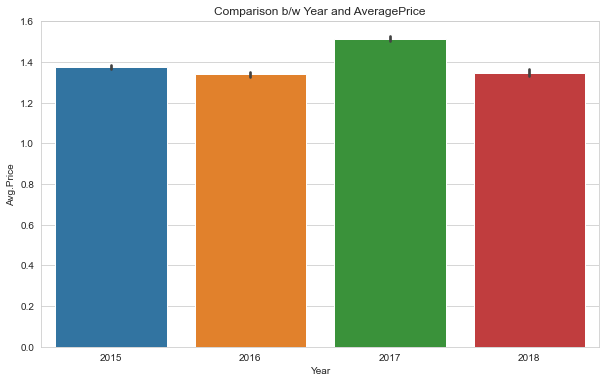

In [33]:
#checking with year has max Avg.price

plt.figure(figsize=(10,6))
plt.title('Comparison b/w Year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'],data=df)
plt.xlabel('Year')
plt.ylabel('Avg.Price')
plt.show()

The barplot shows that the AveragePrice is maximum in the year 2017 followed by2 2015.

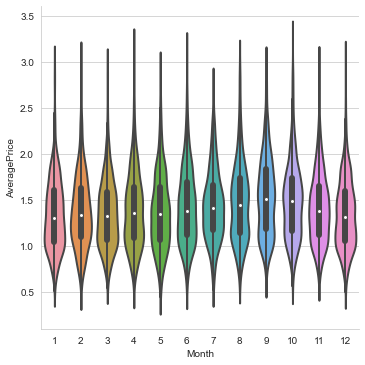

In [34]:
sns.catplot(x='Month',y='AveragePrice',kind='violin',data=df,linewidth=2)

From the plot we can say that the AveragePrice remians high during 8th(August month), 9th(September) and 10th(October) month and starts to fall from November onwards Also the price of avocado is less in the months may to july and again there is an increment of price of avocado in the month April and March

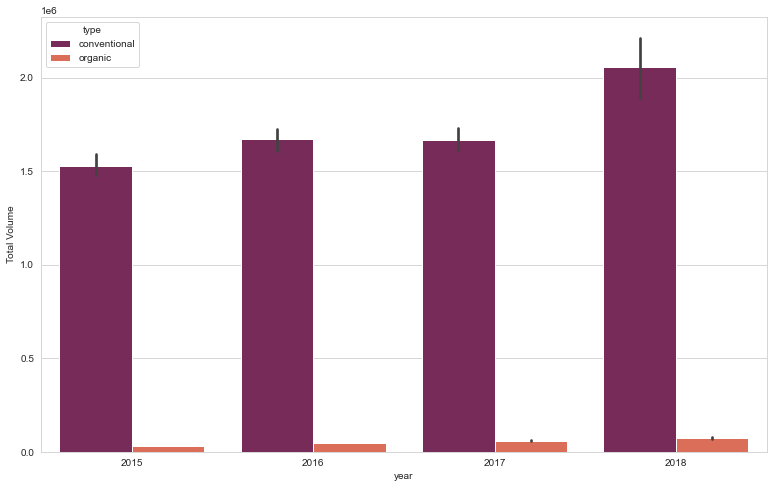

In [35]:
plt.figure(figsize=(13,8))
sns.barplot(x='year',y='Total Volume',hue='type',data=df,ci=50,palette='rocket')
plt.show()

Conventional types were sold higher every year with low price than organic types which means the dem,and for conventional is also high. Also the total sales volume is spotted int he year 2018 and then declined in 2015. The total sales are same in the year 2016 ands 2017.

In [36]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


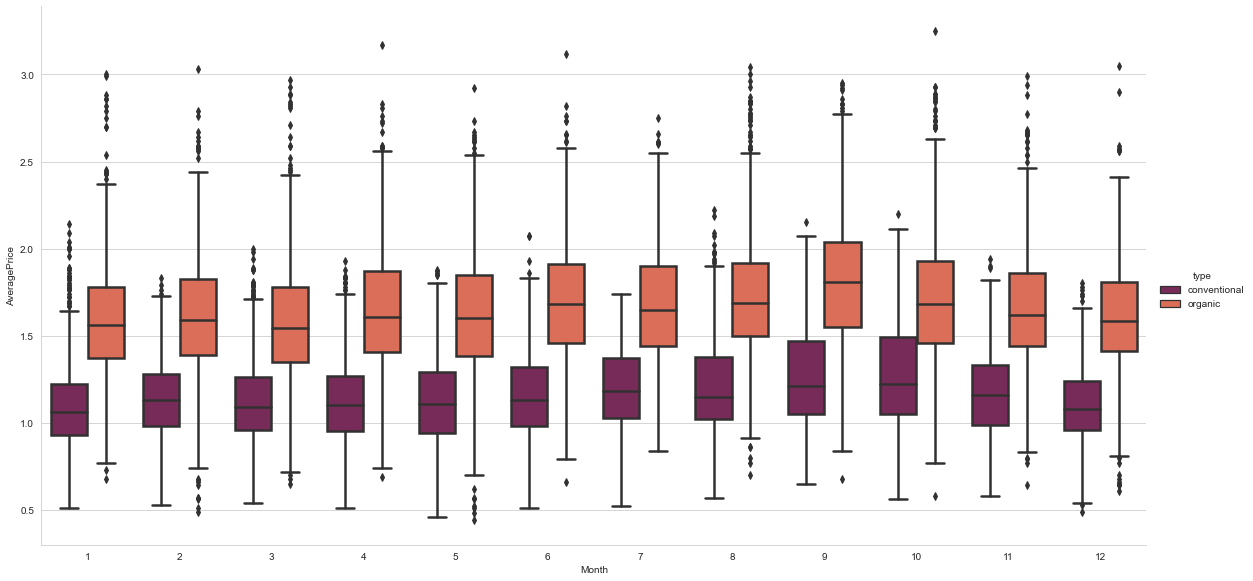

In [37]:
sns.catplot(x='Month',y='AveragePrice',hue='type',kind='box',height=8,linewidth=2.5,aspect=2,data=df,palette='rocket')
plt.show()

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

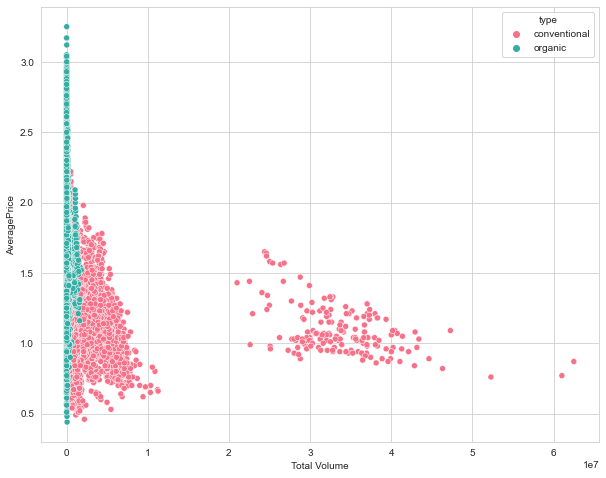

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=df,palette='husl')

The scatterplot givces the relationship between the total volume and average price with respect to type. All organic type of avacado lies in the zero volume and the average price is high for organic. The conventional type avacado has total volume 0-4 with the average price upto 2.3. So the Average Price of the organic type with zero volume is more than the conventional type.

<Figure size 720x576 with 0 Axes>

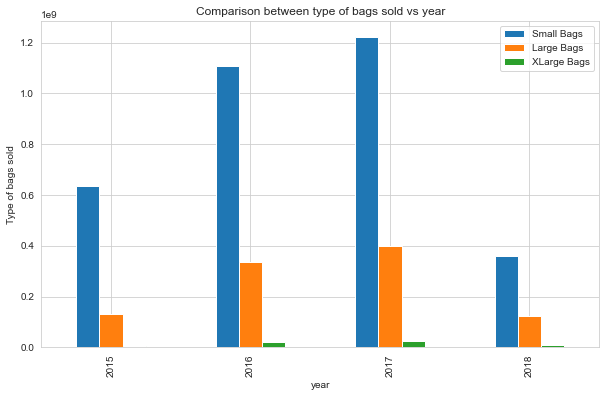

In [39]:
plt.figure(figsize=(10,8))
feature = df[['Small Bags','Large Bags','XLarge Bags']].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('year')
plt.ylabel("Type of bags sold")
plt.show()

Small bag size was sold all time highest where Xlarge Bag size was least sold

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

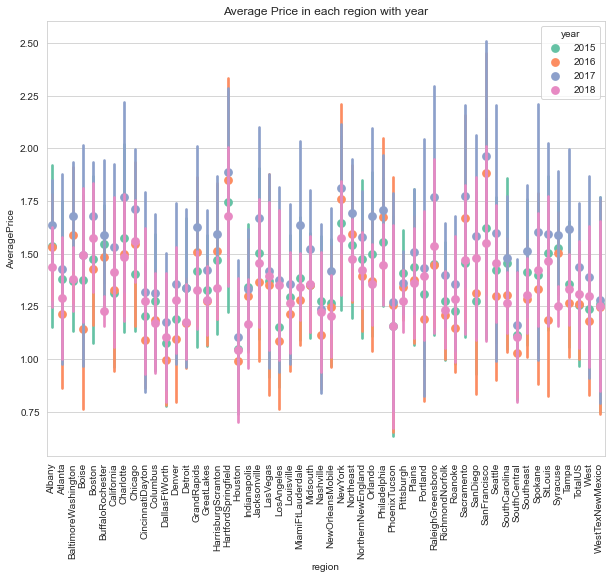

In [40]:
plt.figure(figsize=(10,8))
plt.title('Average Price in each region with year')
sns.pointplot(x='region',y='AveragePrice',data=df,hue='year',join=False,palette='Set2',ci='sd')
plt.xticks(rotation=90)

The average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

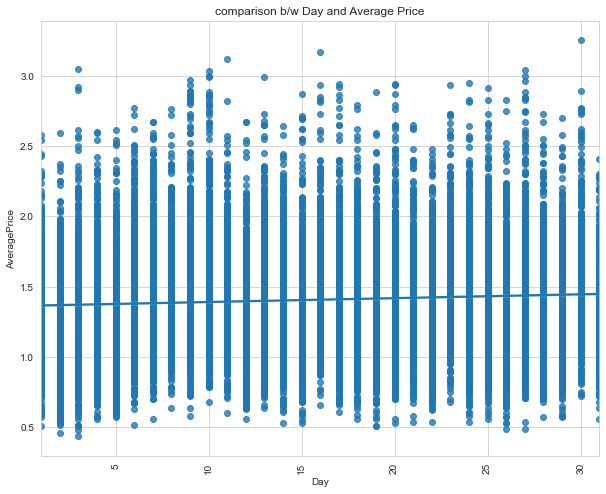

In [41]:
plt.figure(figsize=(10,8))
plt.title('comparison b/w Day and Average Price')
sns.regplot(x='Day',y='AveragePrice',data=df)
plt.xticks(rotation=90)

The average price of avacado id high in almost all the days and less in 7th,14th and 22nd day of the month.

<AxesSubplot:title={'center':'comparison b/w Date and Average Price'}, xlabel='Date', ylabel='AveragePrice'>

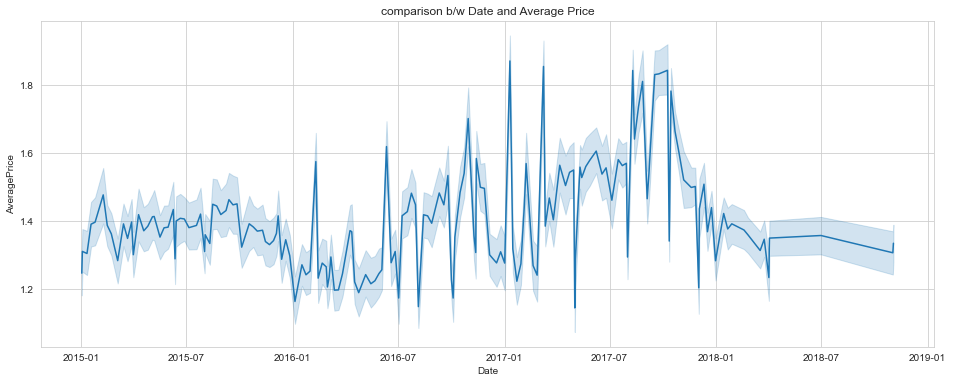

In [42]:
plt.figure(figsize=(16,6))
plt.title('comparison b/w Date and Average Price')
sns.lineplot(x='Date',y='AveragePrice',data=df)

this  shows there was a huge rise in prices after July 2017 and before Jan 2018.

(array([-2500000.,        0.,  2500000.,  5000000.,  7500000., 10000000.,
        12500000., 15000000., 17500000., 20000000., 22500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

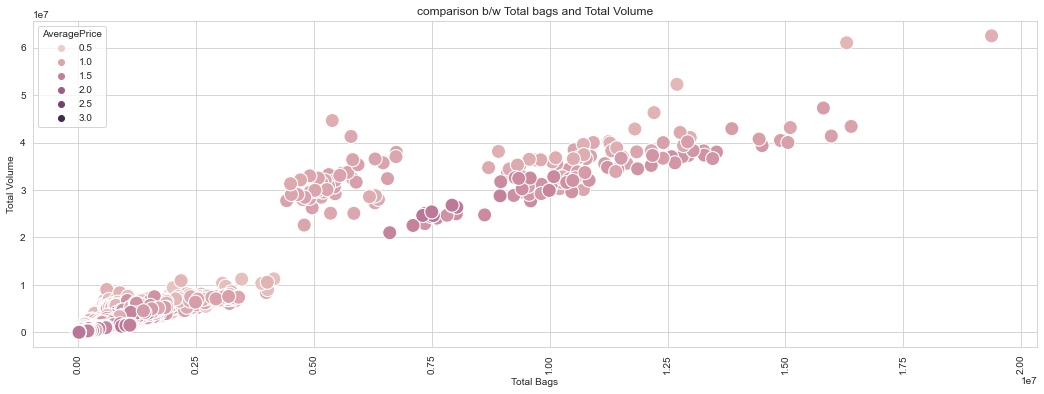

In [43]:
plt.figure(figsize=(18,6))
plt.title('comparison b/w Total bags and Total Volume')
sns.scatterplot(x='Total Bags',y='Total Volume',data=df,hue='AveragePrice',s=200)
plt.xticks(rotation=90)

We can see a linear relation between the Total bags with Total Volume. As the total bags sales increases with total volume,the price of the avacado also increases

Text(6.800000000000004, 0.5, 'Avg price')

<Figure size 936x432 with 0 Axes>

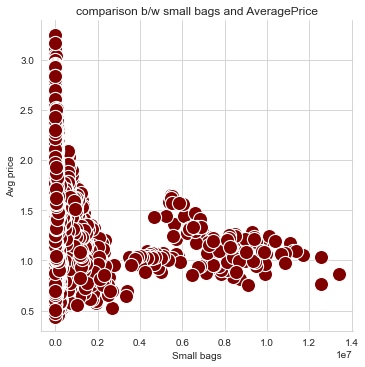

In [44]:
plt.figure(figsize=(13,6))
sns.relplot(df['Small Bags'],df['AveragePrice'],s=200,color='maroon')
plt.title('comparison b/w small bags and AveragePrice')
plt.xlabel('Small bags')
plt.ylabel('Avg price')


The small Bag size has high average price at first and also from the range 0-0.6,the price of small bag size is almost 1.6.

<Figure size 1080x720 with 0 Axes>

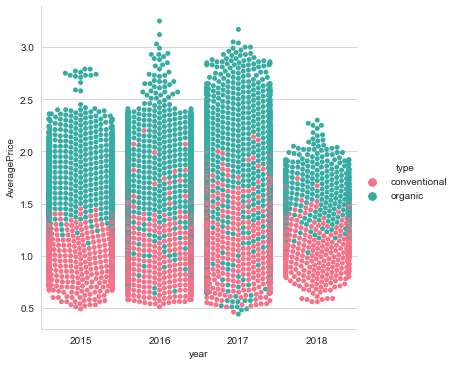

In [47]:
#checking the average price of types of avocados with year
plt.figure(figsize=(15,10))
sns.catplot(x='year', y='AveragePrice', hue='type', data=df, palette='husl',kind='swarm')
plt.show()

Remarks: We can see from the plot above that organic types are always priced higher than the conventional ones as organic farming requires lots of efforts, time and method to grow avocados that yield lesser as compared to conventional ways by using chemical fertilizers.

<Figure size 1080x720 with 0 Axes>

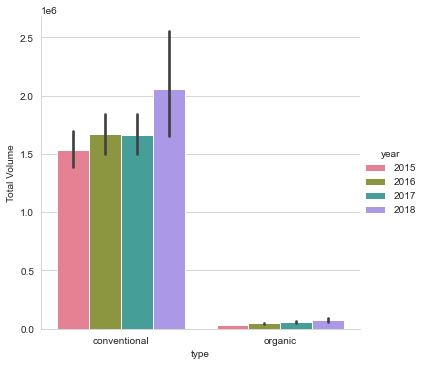

In [45]:
#checking Total volume sold per year 

plt.figure(figsize=(15,10))
sns.catplot(x='type', y='Total Volume', hue="year",kind='bar',data=df, palette="husl")
plt.show()

Remarks: In the above bar plot, we see that the Total Volume for conventional type was high in all 4 years as compared to organic type.

<Figure size 1080x720 with 0 Axes>

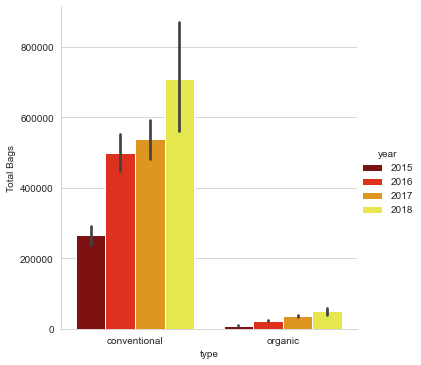

In [46]:
#checking Total Bags used per year 
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="hot")
plt.show()

Remarks: 
In the above bar plot,we see that as the Total Volume sold was always high for conventional types hence, the usage of bags was higher for conventional type over the organic ones.

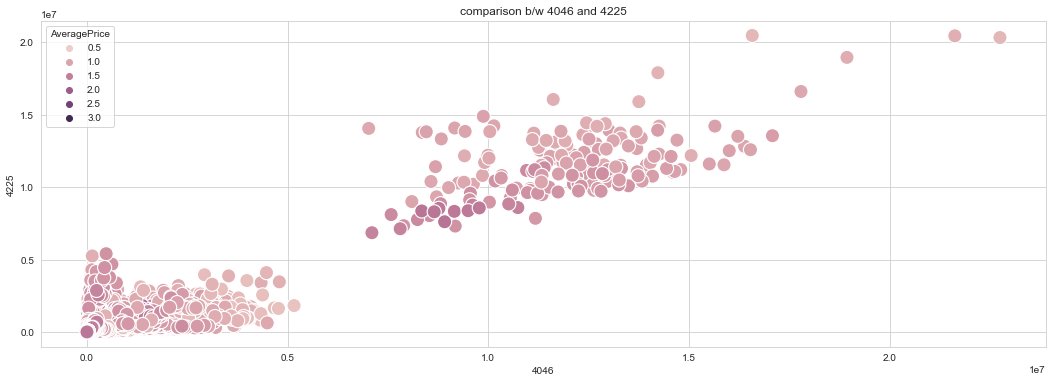

In [47]:
plt.figure(figsize=(18,6))
plt.title('comparison b/w 4046 and 4225')
sns.scatterplot(x='4046',y='4225',data=df,hue='AveragePrice',s=200)
plt.show()

There is a linear relationship between the total number of avacados with PLU 4046 and PLU 4225 sold. The number opf avacados with PLU 4046 and PLU 4225 sold increases, the average price also increases as shown in the graph.These scatter plots can also be observed in the pairplot.

# Multivariate Analysis

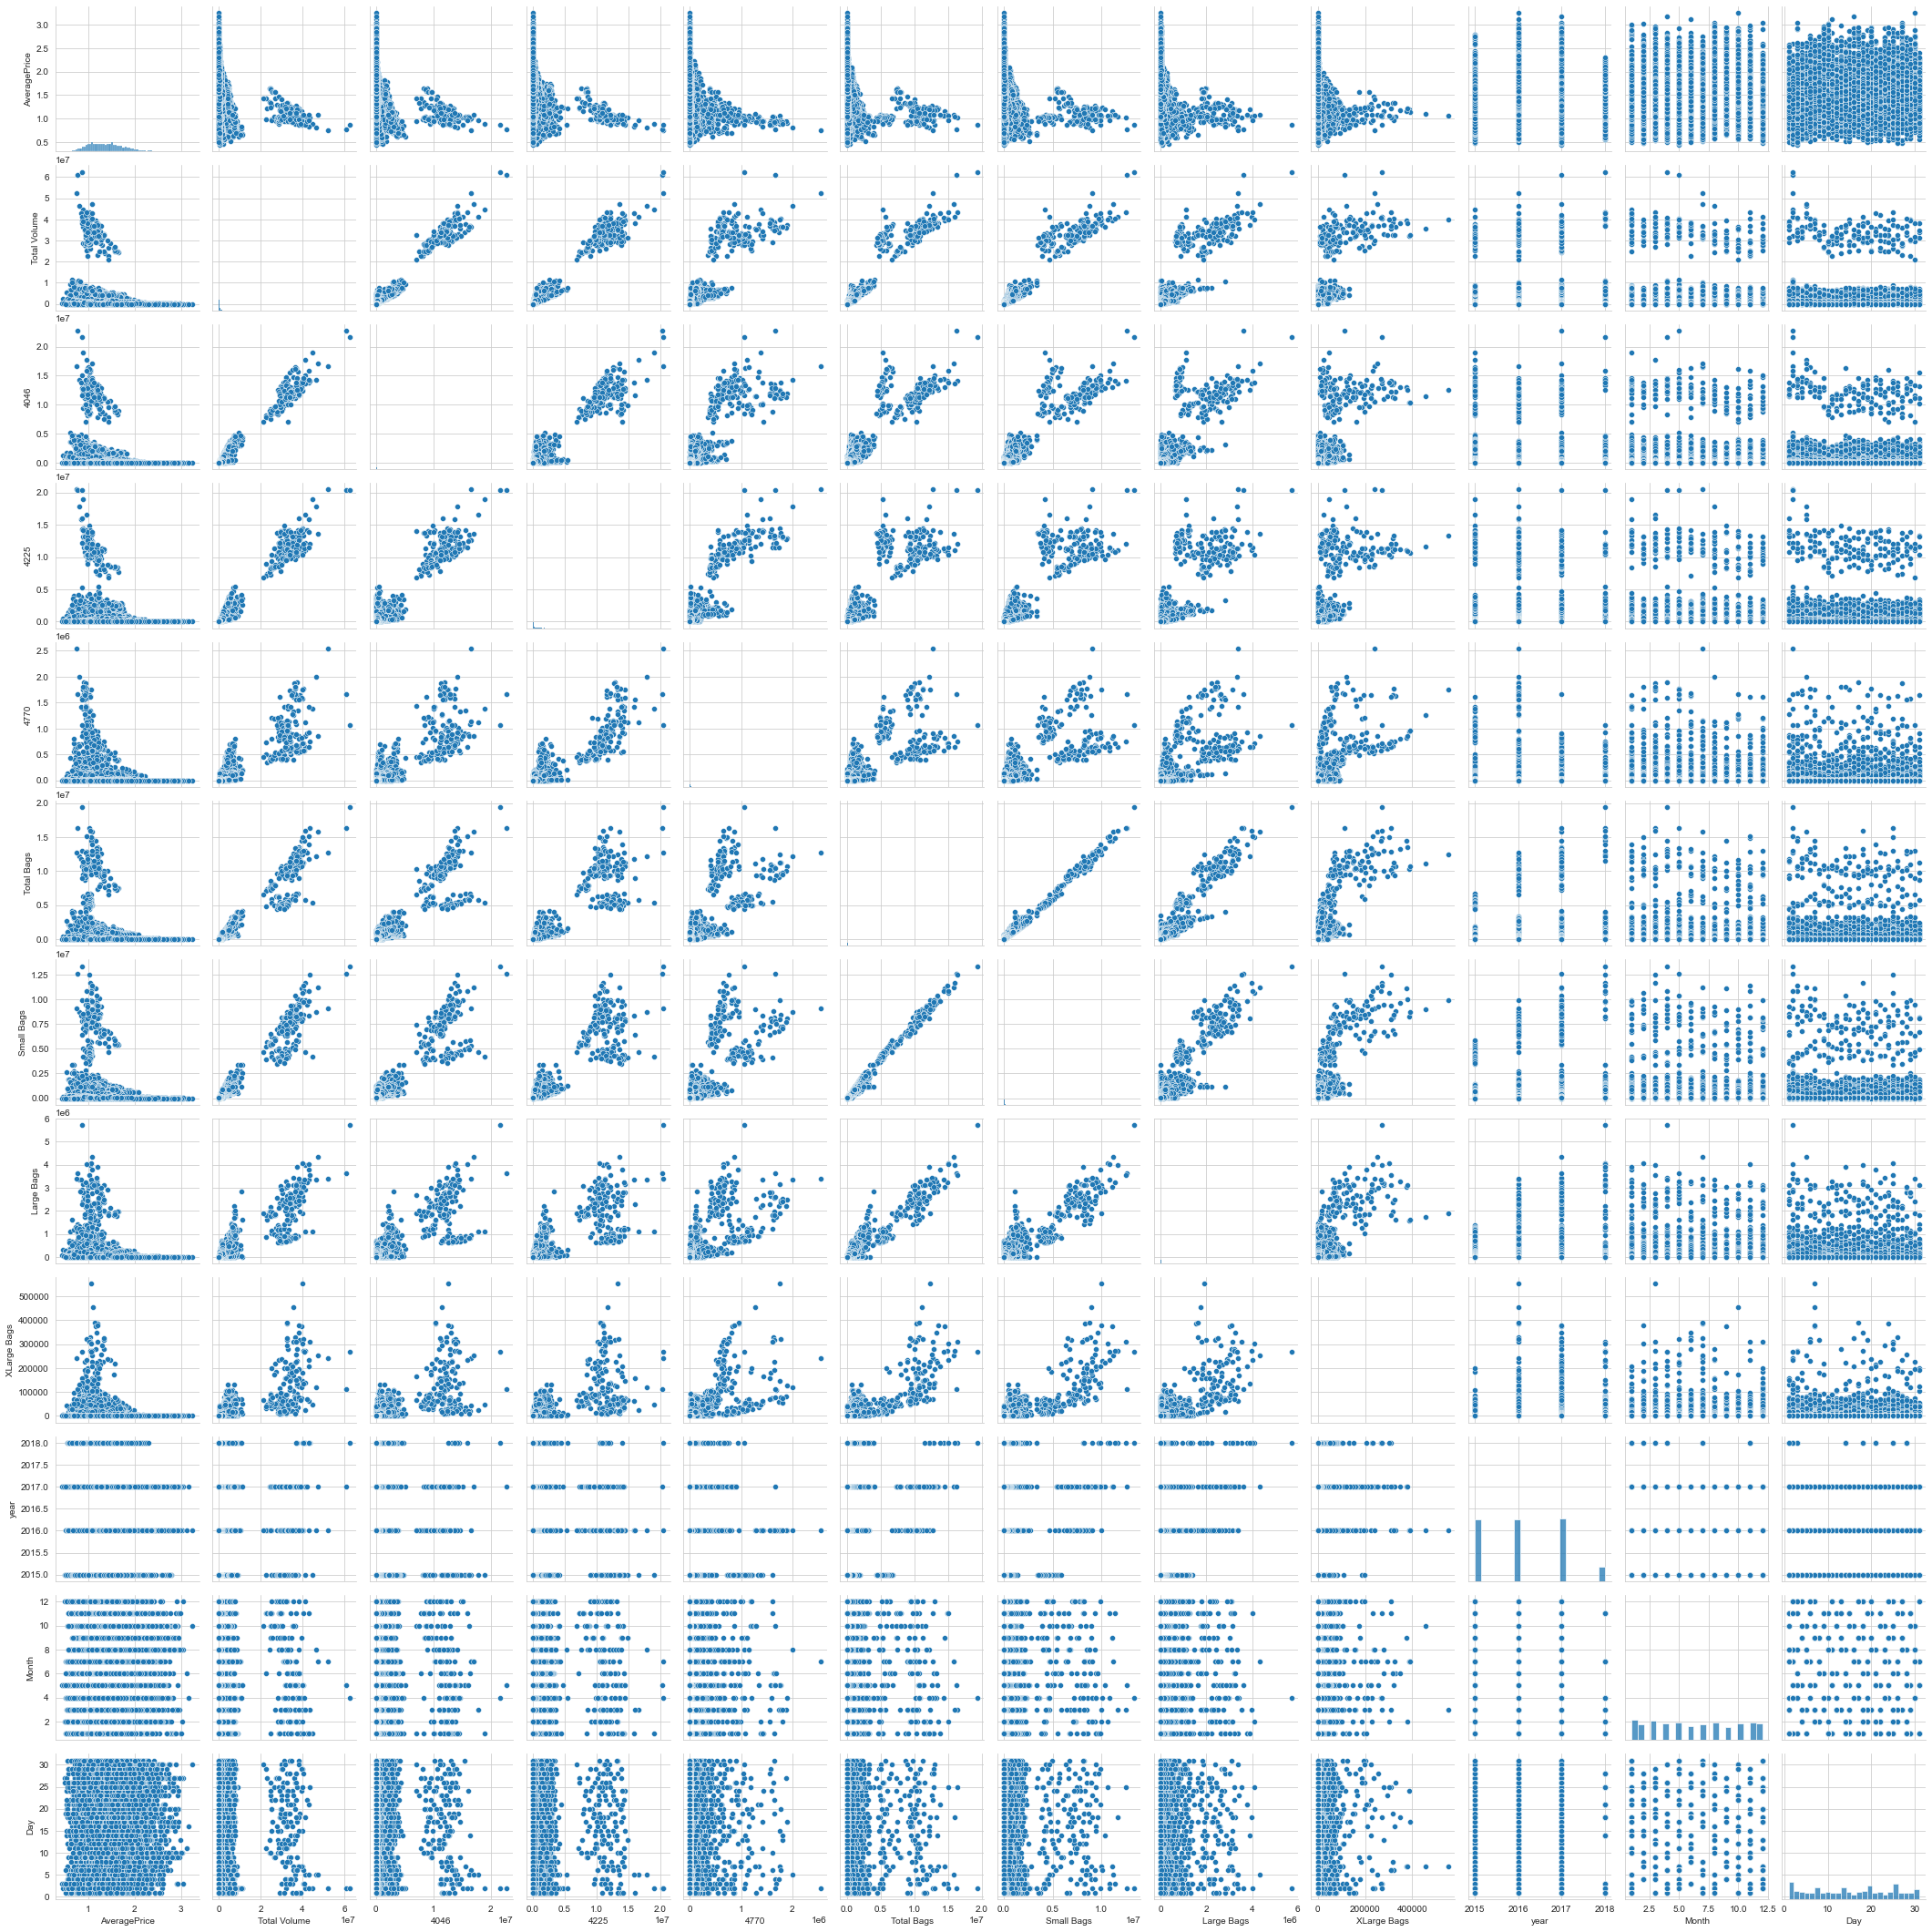

In [51]:
sns.pairplot(df)

From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we can see distribution plotting.

1.We can also observe the correlation between the features and some columns have outliers too.

2.Day column is highly correlated with all the other features.

In [48]:
#Checking correlation between features .

df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.075134,0.061157
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.015344,-0.013212
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.014522,-0.014375
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.015892,-0.014567
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.024220,-0.012446
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.013061,-0.008687
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.012432,-0.007999
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.014330,-0.010477
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.006182,-0.002364
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.098812,-0.026504


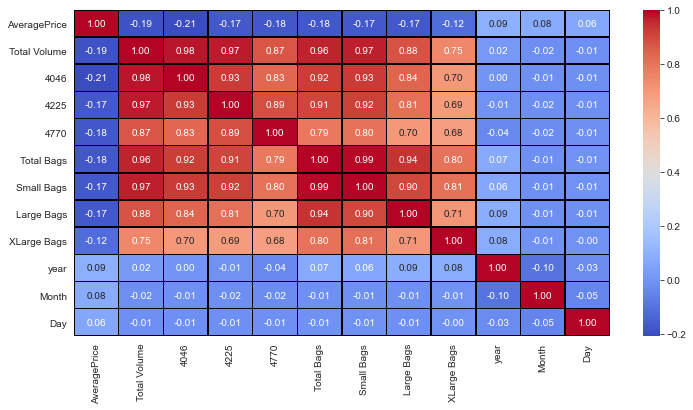

In [49]:
#Checking correlation between features by using heatmap.

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=.5,linecolor='black')
plt.show()

Remarks: There are 2 types of correlation namely: Positive correlation (+1) meaning that both variables move in the same direction together and Negative correlation (–1) meaning that as one variable goes up, the other goes down.

As seen from the heatmap above, all the Features are not correleted with the AveragePrice column, instead most of them are correlated with each other which will not help us to build a good model.

In [50]:
# dropping the column "date" as it is useless now
df.drop(columns=['Date'],inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Encoding the Categorical data using LabelEncoder

In [51]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [52]:
#Encoding the Data

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list=['type','region']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [53]:
#checking tap 5 rows after doing Encoding

df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


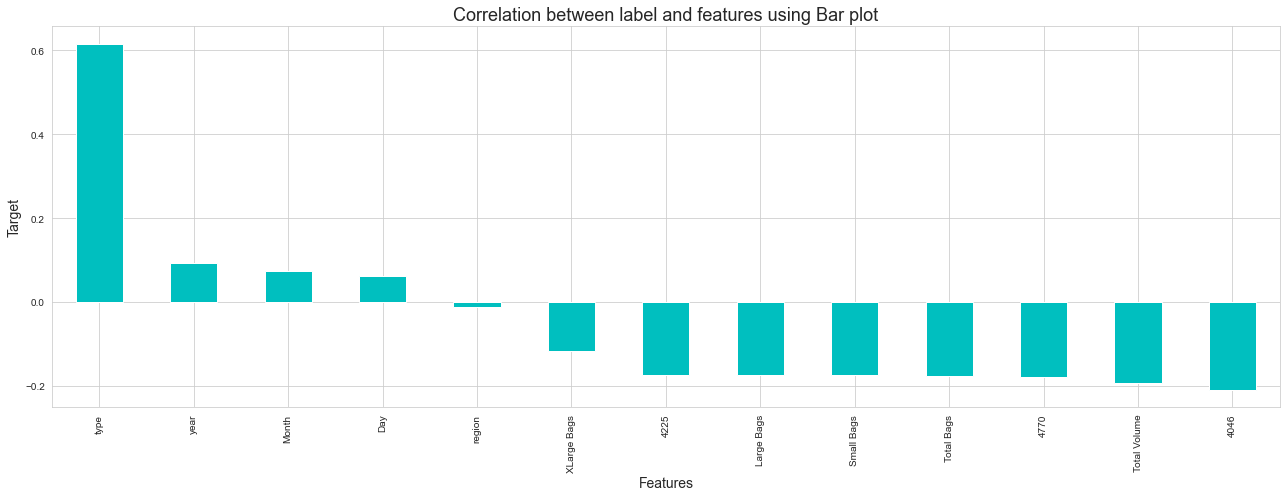

In [54]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

Remarks:

Negatively correlated features: Region, 4046, Large Bags, Total Volume, Total Bags, 4770, Small Bags, 4225 and XLarge Bags.

Positively correlated features: Year, Day and Month and type.

Conclusion: When TARGET variable is Average Price, it is Regression problem.

In [55]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.047551
Day             -0.001609
dtype: float64

Checking skewness of data (optimum value -0.5 to +0.5)

Remarks: Data is heavely skewed in all features except AveragePrice, type, region, Day, Month and it needs to be treated accordingly.


# Checking Outliers:

AveragePrice       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Small Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Large Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.238415,0.125;0.0945122x0.343182)
type               AxesSubplot(0.351829,0.125;0.0945122x0.343182)
year               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
region             AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Month              AxesSubplot(0.692073,0.125;0.0945122x0.343182)
Day                AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

<Figure size 1080x720 with 0 Axes>

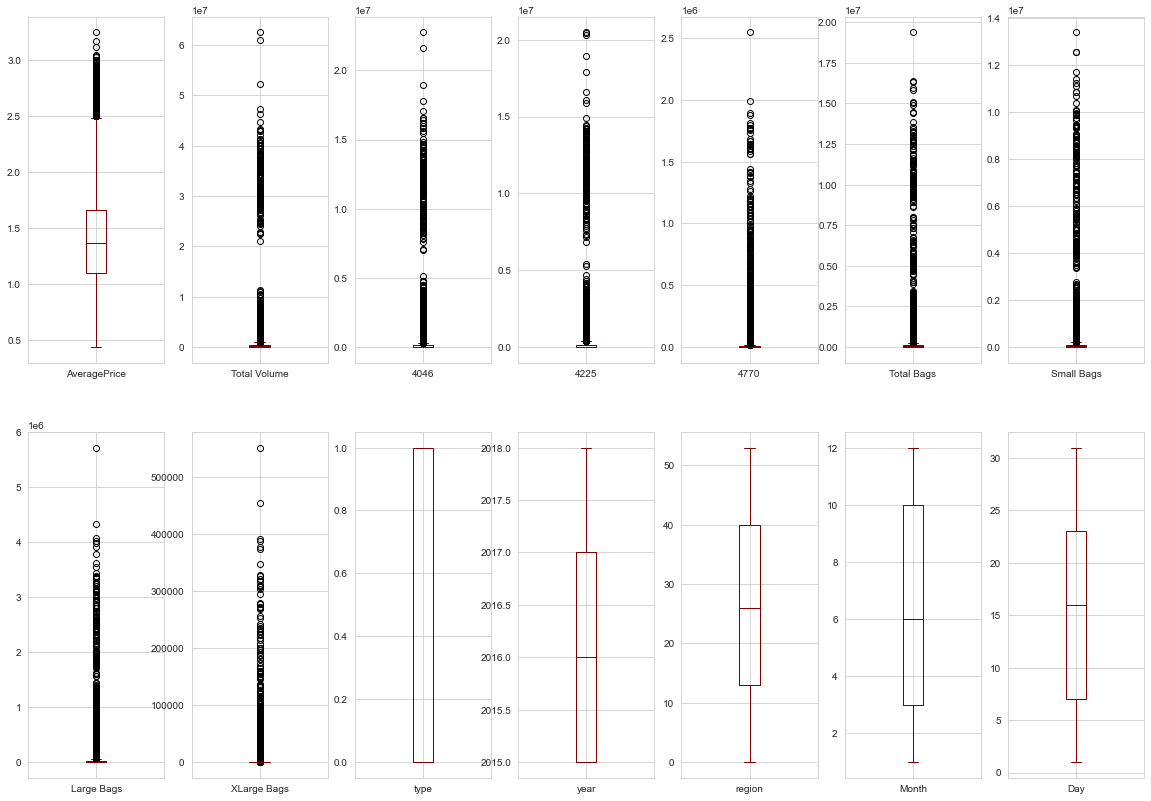

In [56]:
#plotting boxplot for outliers

plt.figure(figsize=(15,10))

df.plot(kind='box',subplots=True,layout=(2,7),figsize=(20,14),color='maroon')

Remarks: The above boxplots shows the presence of outliers in the dataset.

# Removing Outliers

In [57]:
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [58]:
new_df=df[(z<=3).all(axis=1)]

In [59]:
#new shape after removing outliers

new_df.shape

(17651, 14)

In [60]:
#old shape

df.shape

(18249, 14)

# Data loss percent

In [61]:
#checking the data loss perecent

data_loss=(18249-17651)/18249*100
data_loss

3.276891884486821

Remarks: Since Loss of data is 3.27%, therefore, we will be proceeding with outliers removed data

# Checking Skewness:

In [62]:
new_df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.046419
Day            -0.005030
dtype: float64

Checking skewness of data (optimum value -0.5 to +0.5)

Remarks: Data is heavely skewed in all features except AveragePrice, type, region, Day, Month and it needs to be treated accordingly.


# Removing Skewness using yeo-johnson

In [63]:
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [64]:
new_df[features]=scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919


In [65]:
# Checking the skewness after applying yeo-johnson method

new_df.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.229976
region          0.012798
Month           0.046419
Day            -0.005030
dtype: float64

We can see that after applying yeo-johnson method,there is still skewness present in XLarge Bags.So, removing it using log trnsformation

In [66]:
# Removing skewness using log transformation
new_df['XLarge Bags']=np.log1p(new_df['XLarge Bags'])


In [67]:
#checking after removing  skewness

new_df.skew()

AveragePrice    0.377432
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.784316
type           -0.037741
year            0.229976
region          0.012798
Month           0.046419
Day            -0.005030
dtype: float64

# Separating out features and labels

In [68]:
x=new_df.drop(columns=['Day','Month','type','year'])
y=new_df['region']

In [69]:
#checking shape after sepration

x.shape

(17651, 10)

In [70]:
y.shape

(17651,)

# Standard Scalarization

In [71]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,-0.195352,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.688264,-1.695495
1,-0.143510,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.688264,-1.695495
2,-1.232207,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.688264,-1.695495
3,-0.843387,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.688264,-1.695495
4,-0.324959,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.688264,-1.695495
...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.688264,1.747054
17647,0.789660,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.688264,1.747054
17648,1.204402,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.688264,1.747054
17649,1.359930,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.688264,1.747054


now our data is scaled

# Multicolinearity

In [72]:
# Finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.766503,AveragePrice
1,53.561352,Total Volume
2,7.165920,4046
3,12.147788,4225
4,3.455946,4770
5,34.187079,Total Bags
6,17.174827,Small Bags
7,3.434376,Large Bags
8,1.794778,XLarge Bags
9,1.082268,region


The vif value is more than 10 in the features Total Volume,4225,Total Bags','Small Bags' and 'Large Bags'.Removing the vif having highest vif value

In [73]:
#dropping the feature Total volumn

x.drop('Total Volume',axis=1,inplace=True)

In [74]:
# Again checking the vif after removing one column

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.664827,AveragePrice
1,3.659463,4046
2,4.192551,4225
3,3.455943,4770
4,25.469298,Total Bags
5,17.150538,Small Bags
6,3.373953,Large Bags
7,1.793750,XLarge Bags
8,1.073506,region


we drop the highest VIF vlaue that is having high Multicolinearity.

we can not remove all high vif values if we drop there will be the chances of information loss 

now we go for Model building

# Finding best random state:



# LogisticRegression:

In [75]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
        
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.7245090634441088  on Random_State  88


We found that the best random_state value is 88. We'll create train_test split at random state = 88

# Creating train_test Split:

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=88)

# RandomForestClassifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9988670694864048
[[ 98   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0  84 ...   0   0   0]
 ...
 [  0   0   0 ...  64   0   0]
 [  0   0   0 ...   1  74   1]
 [  0   0   0 ...   0   0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       113
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       103
          12       1.00      1.00      1.00        98
          13       1.00      1.0

# GaussianNB

In [79]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[ 98   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0  84 ...   0   0   0]
 ...
 [  0   0   0 ...  64   0   0]
 [  0   0   0 ...   0  76   0]
 [  0   0   0 ...   0   0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       113
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       103
          12       1.00      1.00      1.00        98
          13       1.00      1.00      1.00    

# DecisionTreeClassifier:

In [80]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


1.0
[[ 98   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0  84 ...   0   0   0]
 ...
 [  0   0   0 ...  64   0   0]
 [  0   0   0 ...   0  76   0]
 [  0   0   0 ...   0   0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       113
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       103
          12       1.00      1.00      1.00        98
          13       1.00      1.00      1.00    

# SVC:

In [81]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.9488293051359517
[[ 98   0   0 ...   0   0   0]
 [  0 117   0 ...   0   0   0]
 [  0   0  84 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   1]
 [  0   0   0 ...   0  72   1]
 [  0   0   0 ...   0   0 105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      0.99      1.00       118
           2       0.99      1.00      0.99        84
           3       0.99      1.00      0.99        91
           4       0.98      0.95      0.97       110
           5       0.94      0.98      0.96        91
           6       1.00      0.97      0.99        73
           7       0.99      1.00      0.99        85
           8       0.99      0.98      0.98        99
           9       0.96      0.96      0.96       113
          10       0.96      0.94      0.95       105
          11       0.99      1.00      1.00       103
          12       0.99      1.00      0.99        98
          13       0.94      0.9

# cross validation score

In [84]:
#Checking cross validation score of LogisticRegression Classifier
from sklearn.model_selection import cross_val_score
cv=cross_val_score(LR,x,y,cv=5)
print('cross validation score for LogisticRegression is',cv.mean())

cross validation score for LogisticRegression is 0.5700537770279106


In [83]:
# Checking cross validation score of RandomForest Classifier:

cv= cross_val_score(rfc,x,y,cv=5)
print('Cross validation score for RandomForest is',cv.mean())

Cross validation score for RandomForest is 0.9758658358224161


In [85]:
# Checking cross validation score of DecisionTree Classifier:

cv= cross_val_score(dt,x,y,cv=5)
print('Cross validation score for RandomForest is', cv.mean())

Cross validation score for RandomForest is 1.0


In [86]:
# Checking cross validation score of SVC:

cv= cross_val_score(svc,x,y,cv=5)
print('Cross validation score for SVC is',cv.mean())

Cross validation score for SVC is 0.8512270998352914


In [87]:
# Checking cross validation score of GaussianNB:

cv= cross_val_score(gnb,x,y,cv=5)
print('Cross validation score for SVC is',cv.mean())

Cross validation score for SVC is 1.0


Remarks:

From above models, both GuassianNB and DecisionTreeClassifier performs best with accuracy score of 100%. But we are proceeding with GaussianNB.

# Hyper parameter tuning:

In [88]:
parameters = {
    'var_smoothing':[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]}
gsv = GridSearchCV(GaussianNB(),parameters,cv=5)
gsv.fit(x_train, y_train)
gsv.best_params_

{'var_smoothing': 0.0001}

In [89]:
gnb=GaussianNB(var_smoothing=0.0001)
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[ 98   0   0 ...   0   0   0]
 [  0 118   0 ...   0   0   0]
 [  0   0  84 ...   0   0   0]
 ...
 [  0   0   0 ...  64   0   0]
 [  0   0   0 ...   0  76   0]
 [  0   0   0 ...   0   0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        85
           8       1.00      1.00      1.00        99
           9       1.00      1.00      1.00       113
          10       1.00      1.00      1.00       105
          11       1.00      1.00      1.00       103
          12       1.00      1.00      1.00        98
          13       1.00      1.00      1.00    

# Saving the best ML Model:

In [90]:
#Selecting final model

joblib.dump(gnb,'Avacado_classification_Model.pkl')

['Avacado_classification_Model.pkl']

# Loading the model

In [91]:
pred_data=pd.DataFrame()
pred_data['Real_values']=y_test
pred_data['Predicted_by_model']=pred
pred_data

,Real_values,Predicted_by_model
2158,41,41
7284,31,31
3665,16,16
1685,32,32
8452,53,53
...,...,...
11182,39,39
6923,24,24
13044,21,21
15287,10,10


This is the dataframe having Real data with the predicted data from the best model

# Conclusion:

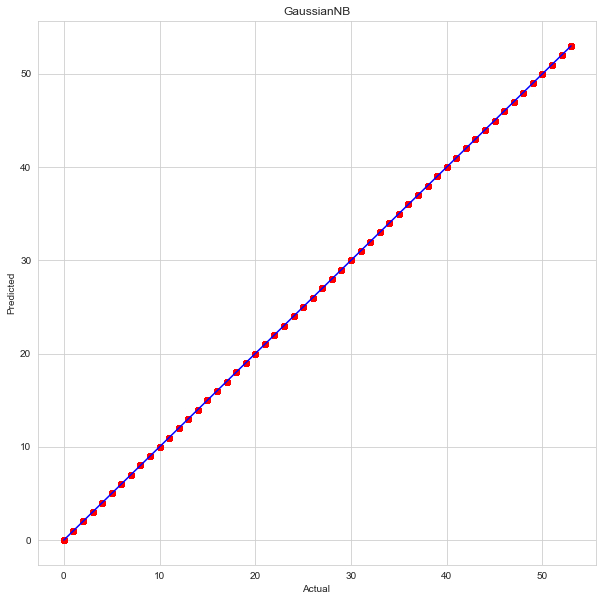

In [92]:
# Prediction Visualization

plt.figure(figsize=(10,10))
plt.scatter(y_test,pred,c='r')
plt1=max(max(pred),max(y_test))
plt2=min(min(pred),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual ')
plt.ylabel('Predicted')
plt.title('GaussianNB')
plt.show()

# Final conclusion:
Final model GuassianNB performs well with an accuracy score of 100%

# Task 2

Average Price is the target variable which contains continuous data, so it is a regression type problem.

In [93]:
#top 5 rows of dataset

df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


# Regression Model

In [94]:
#seperating out features and label

x_reg=new_df.drop(columns=['type'])
y_reg=new_df['AveragePrice']



In [95]:
#checking shape

print(x_reg.shape)
print(y_reg.shape)

(17651, 13)
(17651,)


In [96]:
#treating skewness of data

from sklearn.preprocessing import power_transform
x_reg_t = power_transform(x_reg,method='yeo-johnson')

In [97]:
#scaling the Model 

sc_reg=StandardScaler()
x_reg_scaled=sc_reg.fit_transform(x_reg_t)

# Finding the best  random state for model:

In [151]:
maxAcc=0
maxRs=0

maxAcc = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    Lr=LinearRegression()
    Lr.fit(x_train,y_train)
    pred = Lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is ",maxAcc,"at random_state",i)
        

Maximum r2_score is  1.0 at random_state 199


# Regression Algorithms

In [98]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor


# LinearRegression

In [99]:
#checking R2 score

lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score',r2_score(y_test,pred))

#mean absolute error
print('MAE',mean_absolute_error(y_test,pred))

#mean squared error
print('MSE',mean_squared_error(y_test,pred))

#root mean squared error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 1.0
MAE 5.15264232758056e-15
MSE 5.066465121945886e-29
RMSE 7.117910593668542e-15


# RandomForestRegressor

In [100]:
#checking R2 score

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('R2_score',r2_score(y_test,pred))

#mean absolute error
print('MAE',mean_absolute_error(y_test,pred))

#mean squared error
print('MSE',mean_squared_error(y_test,pred))

#root mean squared error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.9999999999210476
MAE 1.8882175226582346e-06
MSE 1.888217522657859e-08
RMSE 0.00013741242748230084


# Ridge

In [101]:
#checking r2 score

rg=Ridge()
rg.fit(x_train,y_train)
pred=rg.predict(x_test)
print('R2_score',r2_score(y_test,pred))

#mean absolute error
print('MAE',mean_absolute_error(y_test,pred))

#mean squared error
print('MSE',mean_squared_error(y_test,pred))

#root mean squared error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.9999999928138844
MAE 0.0011314243487499883
MSE 1.7186231286150054e-06
RMSE 0.0013109626724720294


# Lasso

In [102]:
#checking r2 score

ls=Lasso()
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score',r2_score(y_test,pred))

#mean absolute error
print('MAE',mean_absolute_error(y_test,pred))

#mean squared error
print('MSE',mean_squared_error(y_test,pred))

#root mean squared error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.9957406188110443
MAE 0.8723324947188816
MSE 1.018668695199015
RMSE 1.0092911845443886


# KNeighborsRegressor

In [133]:
#checking r2 score

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score',r2_score(y_test,pred))

#mean absolute error
print('MAE',mean_absolute_error(y_test,pred))

#mean squared error
print('MSE',mean_squared_error(y_test,pred))

#root mean squared error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.997845893129564
MAE 0.21793806646525685
MSE 0.5151737160120845
RMSE 0.7177560281962698


# AdaBoostRegressor

In [104]:
#checking r2 score

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print('R2_score',r2_score(y_test,pred))

#mean absolute error
print('MAE',mean_absolute_error(y_test,pred))

#mean squared error
print('MSE',mean_squared_error(y_test,pred))

#root mean squared error
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

R2_score 0.9845242118655808
MAE 1.6559720506815505
MSE 3.7011716506946497
RMSE 1.9238429381565039


# Cross Validation Score

In [110]:
# Checking cross valiodation score for LinearRegression

print('cross validation score',cross_val_score(lr,x,y,cv=5).mean())

cross validation score 1.0


In [111]:
# Checking cross valiodation score for AdaBoost

print('cross validation score',cross_val_score(ad,x,y,cv=5).mean())

cross validation score 0.9827819607640302


In [112]:
# Checking cross valiodation score for Knn

print('cross validation score',cross_val_score(knn,x,y,cv=5).mean())

cross validation score 0.9714162800542564


In [113]:
# Checking cross valiodation score for Rige

print('cross validation score',cross_val_score(rg,x,y,cv=5).mean())

cross validation score 0.9999999933300192


In [114]:
# Checking cross valiodation score for RandomForestRegressor

print('cross validation score',cross_val_score(rfr,x,y,cv=5).mean())

cross validation score 0.9999994402478892


Remarks: From above models,KNeighborsRegressor  performs best with R2 Score of 99% hence,proceeding with this as our final model



# Hyper parameter tuning:

In [135]:
# KNeighbor Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}


In [138]:
from sklearn.neighbors import KNeighborsRegressor

GCV = GridSearchCV(KNeighborsRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}

In [144]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

avacado = KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors=2, weights='distance')
avacado.fit(x_train,y_train)
pred = avacado.predict(x_test)
print("RMSE value :",np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score :',r2_score(y_test,pred)*100)

RMSE value : 0.5514623834847615
R2_score : 99.8728415177274


After tuning the r2_score of the model is increased and it is 99.87%

# Saving the best ML model:

In [145]:
#Selecting final model

joblib.dump(avacado,'Avacado_Regressor_Model.pkl')

['Avacado_Regressor_Model.pkl']

# Predicting the saved model

In [147]:
# Loading the saved model
model = joblib.load('Avacado_Regressor_Model.pkl')

# Predictions

In [148]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_final = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_final

,Original,Predicted
0,41,41.000000
1,31,31.000000
2,16,16.000000
3,32,32.000000
4,53,53.000000
...,...,...
5291,39,39.000000
5292,24,24.000000
5293,21,21.000000
5294,10,9.634148


Here we can observe both original and predicted values are almost same.

# Prediction Visualization

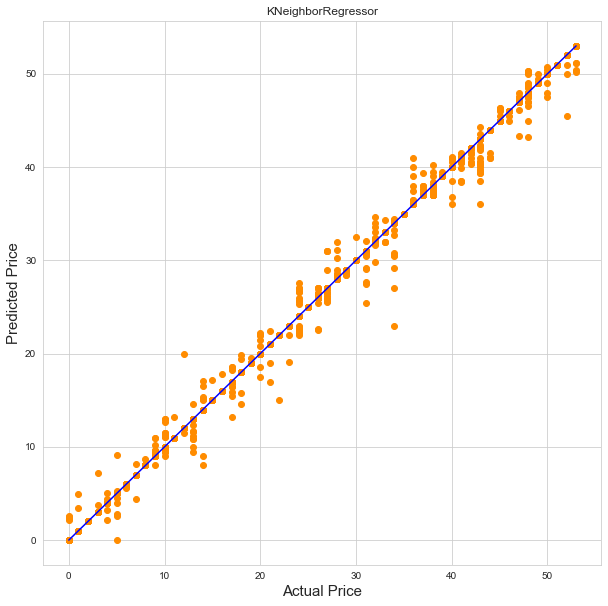

In [149]:
plt.figure(figsize=(10,10))
plt.title("KNeighborRegressor")
plt.scatter(y_test,predicted,c='darkorange')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

The blue line represents the actual Average Price of the avocado and scattered points are the predicted price of the avocado.

# Final Remarks:
    
The Final Regression Model KNeighborsRegressor performs well with R2 Score of 99.87%

# CONCLUSION:
    
1. We built two model from the avocado dataset. One is Classification model and the other one is Regression model.
2. We did EDA to have a better understanding of the data and how we could process it to build our models.
3. For the classification model, we found that Gaussian performs well with accuracy of 100%.
4. For the Regression model, we found that KNeighborsRegressor performs well with R2 Score of 99.8%